## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('datasets/real_estate_price_size_year.csv')
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [3]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [4]:
x_size = data.iloc[:,0:3]
x_size

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_size)

x_scaled = scaler.transform(x_size)
x_scaled

array([[-0.75621141, -0.70816415,  0.51006137],
       [-0.83098579, -0.66387316, -0.76509206],
       [-0.13908647, -1.23371919,  1.14763808],
       [ 1.42131906,  2.19844528,  0.51006137],
       [ 2.17026934,  1.42498884, -0.76509206],
       [-0.61617272, -0.937209  , -1.40266877],
       [-0.35427155, -0.95171405,  0.51006137],
       [-1.52054038, -0.78328682, -1.40266877],
       [ 0.50624953, -0.57603328,  1.14763808],
       [-0.96078238, -0.53467702, -0.76509206],
       [-0.16610306,  0.69939906, -0.76509206],
       [ 2.64120784,  3.33780001, -0.76509206],
       [-1.00198088, -0.53467702,  0.51006137],
       [ 1.64954949,  0.52699137,  1.14763808],
       [ 1.98136758,  1.51100715, -1.40266877],
       [ 1.9293182 ,  1.77668568, -1.40266877],
       [-0.57329398, -0.54810263,  1.14763808],
       [-0.75798514, -0.77276222, -1.40266877],
       [-0.87180655, -0.58004747, -1.40266877],
       [ 0.09296888,  0.58943055,  1.14763808],
       [-0.31519249, -0.78365788,  0.510

## Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[299.99999999999994,
 161.11258128109972,
 94.15259153691234,
 67.20234034213998,
 49.03538605416731,
 41.285070091863986,
 35.05542840141086,
 31.696330292447758,
 28.971469028531356]

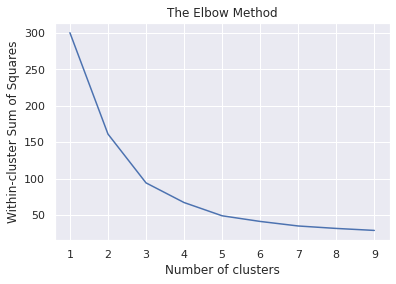

In [8]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [9]:
kmeans = KMeans(3)
kmeans.fit(x_size)

KMeans(n_clusters=3)

In [10]:
cluster = x_size.copy()
cluster['cluster_pred'] = kmeans.fit_predict(x_size)

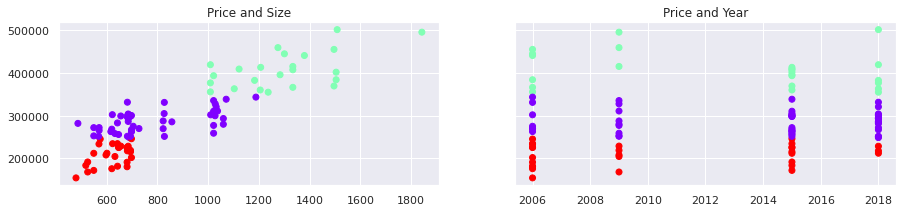

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (15, 3))
ax1.scatter(cluster['size'], cluster['price'], c = cluster['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Price and Size')
ax2.scatter(cluster['year'], cluster['price'], c = cluster['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Price and Year')
plt.show()

## Heatmap

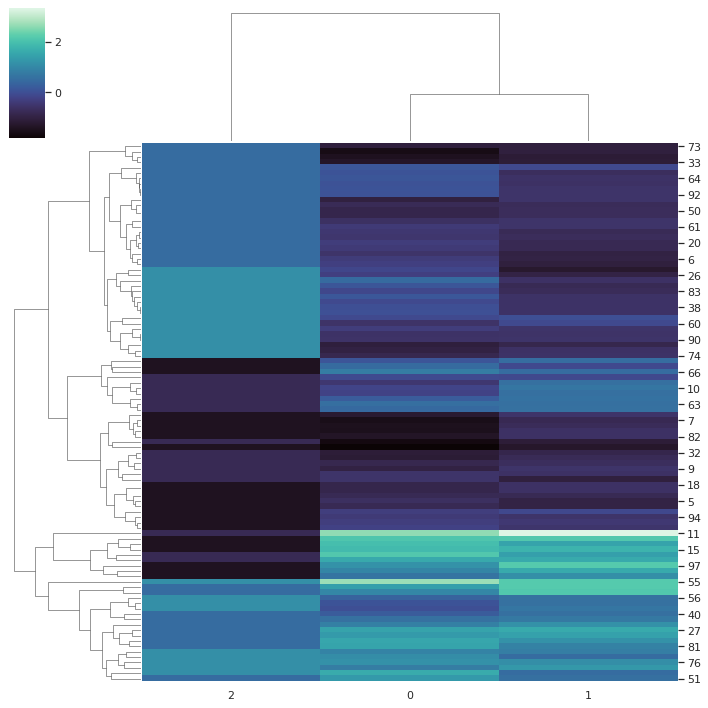

In [12]:
sns.clustermap(x_scaled, cmap = 'mako')